Hate Crime Dataframe and Choropleth Maps by State
================
--------------------------------------
Create a Dataframe including following columns:
* State
* State Code
* Number of hate crimes (Race/Ethnicity/Religion) for the following years:
    * 2012
    * 2013
    * 2014
    * 2015
    * 2016
* Hate Crime Rate (Race/Ethnicity/Religion) per 10,000 population for the following years:
    * 2012
    * 2013
    * 2014
    * 2015
    * 2016
* Estimated Population by State for the following years:
    * 2012
    * 2013
    * 2014
    * 2015
    * 2016
* Total Number of hate crimes (Race/Ethnicity/Religion) from 2012 to 2016
* Average Hate Crime Rate (Race/Ethnicity/Religion) per 10,000 population from 2012 to 2016 

## Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

## Hate Crime Dataframes by agency name, by year (2012-2016) 

In [3]:
#FILES CONTAINING DATA REQUIRED FOR ANALYSIS
#Hate Crime Data from https://ucr.fbi.gov from 2012 to 2016
csv_crime_2012 = "Resources/Crime Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2012.csv"
csv_crime_2013 = "Resources/Crime Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2013.csv"
csv_crime_2014 = "Resources/Crime Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2014.csv"
csv_crime_2015 = "Resources/Crime Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2015.csv"
csv_crime_2016 = "Resources/Crime Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2016.csv"
#CSV with U.S. States name and code
csv_states = "Resources/Census Resources/states.csv"
#U.S. States Population estimates by state based on Census 2010
csv_population = "Resources/Census Resources/population_estimates.csv"

#Dataframes created from CSV files
states_df = pd.read_csv(csv_states)
population_df = pd.read_csv(csv_population)
hate_crime_2012 = pd.read_csv(csv_crime_2012)
hate_crime_2013 = pd.read_csv(csv_crime_2013)
hate_crime_2014 = pd.read_csv(csv_crime_2014)
hate_crime_2015 = pd.read_csv(csv_crime_2015)
hate_crime_2016 = pd.read_csv(csv_crime_2016)

#Drop rows with value different than 'Total' for Agency Type column
hate_crime_2012 = hate_crime_2012.loc[hate_crime_2012['Agency type'] == 'Total']
hate_crime_2013 = hate_crime_2013.loc[hate_crime_2013['Agency type'] == 'Total']
hate_crime_2014 = hate_crime_2014.loc[hate_crime_2014['Agency type'] == 'Total']
hate_crime_2015 = hate_crime_2015.loc[hate_crime_2015['Agency Type'] == 'Total']
hate_crime_2016 = hate_crime_2016.loc[hate_crime_2016['Agency Type'] == 'Total']

#Columns created to sum hate crimes related with Race/Ethnicity/Religion (hate crimes related with immigration)
hate_crime_2012['2012 Crimes'] = hate_crime_2012['Race'] + hate_crime_2012['Ethnicity'] + hate_crime_2012['Religion']
hate_crime_2013['2013 Crimes'] = hate_crime_2013['Race'] + hate_crime_2013['Ethnicity'] + hate_crime_2013['Religion']
hate_crime_2014['2014 Crimes'] = hate_crime_2014['Race'] + hate_crime_2014['Ethnicity'] + hate_crime_2014['Religion']
hate_crime_2015 = hate_crime_2015.rename(columns={'Race/\nEthnicity/\nAncestry': '2015 Crimes'})
hate_crime_2016 = hate_crime_2016.rename(columns={'Race/\nEthnicity/\nAncestry': '2016 Crimes'})
hate_crime_2015['2015 Crimes'] = hate_crime_2015['2015 Crimes'] + hate_crime_2015['Religion']
hate_crime_2016['2016 Crimes'] = hate_crime_2016['2016 Crimes'] + hate_crime_2016['Religion']

#Dataframes edited to contain only relevant columns
hate_crime_2012 = hate_crime_2012[["State", "2012 Crimes"]]
hate_crime_2013 = hate_crime_2013[["State", "2013 Crimes"]]
hate_crime_2014 = hate_crime_2014[["State", "2014 Crimes"]]
hate_crime_2015 = hate_crime_2015[["State", "2015 Crimes"]]
hate_crime_2016 = hate_crime_2016[["State", "2016 Crimes"]]

#Rename column to match with other dataframes
population_df = population_df.rename(columns={'Geographic Area':'State'})

#Create dataframes for each year estimated population
population_2012 = population_df[["State", "2012"]]
population_2013 = population_df[["State", "2013"]]
population_2014 = population_df[["State", "2014"]]
population_2015 = population_df[["State", "2015"]]
population_2016 = population_df[["State", "2016"]]

#Merge Dataframes to combine estimated population and hate crime data for each year
hate_crime_2012 = pd.merge(hate_crime_2012, population_2012, on="State")
hate_crime_2013 = pd.merge(hate_crime_2013, population_2013, on="State")
hate_crime_2014 = pd.merge(hate_crime_2014, population_2014, on="State")
hate_crime_2015 = pd.merge(hate_crime_2015, population_2015, on="State")
hate_crime_2016 = pd.merge(hate_crime_2016, population_2016, on="State")

#Rename columns in the merged dataframes
hate_crime_2012 = hate_crime_2012.rename(columns={'2012': '2012 Est. Population'})
hate_crime_2013 = hate_crime_2013.rename(columns={'2013': '2013 Est. Population'})
hate_crime_2014 = hate_crime_2014.rename(columns={'2014': '2014 Est. Population'})
hate_crime_2015 = hate_crime_2015.rename(columns={'2015': '2015 Est. Population'})
hate_crime_2016 = hate_crime_2016.rename(columns={'2016': '2016 Est. Population'})

#Replace commas included in numeric columns and change datatype to Float
hate_crime_2012["2012 Est. Population"] = hate_crime_2012["2012 Est. Population"].str.replace(",","").astype(float)
hate_crime_2013["2013 Est. Population"] = hate_crime_2013["2013 Est. Population"].str.replace(",","").astype(float)
hate_crime_2014["2014 Est. Population"] = hate_crime_2014["2014 Est. Population"].str.replace(",","").astype(float)
hate_crime_2015["2015 Est. Population"] = hate_crime_2015["2015 Est. Population"].str.replace(",","").astype(float)
hate_crime_2016["2016 Est. Population"] = hate_crime_2016["2016 Est. Population"].str.replace(",","").astype(float)

#Create new columns for Hate Crime Rate
hate_crime_2012["2012 Crime Rate Per 10,000"] = round(hate_crime_2012["2012 Crimes"].astype("float") / hate_crime_2012["2012 Est. Population"] * 100000,3) 
hate_crime_2013["2013 Crime Rate Per 10,000"] = round(hate_crime_2013["2013 Crimes"].astype("float") / hate_crime_2013["2013 Est. Population"] * 100000,3) 
hate_crime_2014["2014 Crime Rate Per 10,000"] = round(hate_crime_2014["2014 Crimes"].astype("float") / hate_crime_2014["2014 Est. Population"] * 100000,3) 
hate_crime_2015["2015 Crime Rate Per 10,000"] = round(hate_crime_2015["2015 Crimes"].astype("float") / hate_crime_2015["2015 Est. Population"] * 100000,3) 
hate_crime_2016["2016 Crime Rate Per 10,000"] = round(hate_crime_2016["2016 Crimes"].astype("float") / hate_crime_2016["2016 Est. Population"] * 100000,3) 

#Merge dataframes to create Hate Crime Dataframe by State (2012-2016)
hate_crime_df = states_df
hate_crime_df = pd.merge(hate_crime_df, hate_crime_2012, on="State", how="left")
hate_crime_df = pd.merge(hate_crime_df, hate_crime_2013, on="State", how="left")
hate_crime_df = pd.merge(hate_crime_df, hate_crime_2014, on="State", how="left")
hate_crime_df = pd.merge(hate_crime_df, hate_crime_2015, on="State", how="left")
hate_crime_df = pd.merge(hate_crime_df, hate_crime_2016, on="State", how="left")

#Fill NULL values with 0
hate_crime_df = hate_crime_df.fillna(0)

#Create Total Crimes and Average Crime Rate columns
hate_crime_df["Total Crimes"] = hate_crime_df["2012 Crimes"] + hate_crime_df["2013 Crimes"] + hate_crime_df["2014 Crimes"] + hate_crime_df["2015 Crimes"] + hate_crime_df["2016 Crimes"] 
hate_crime_df["Average Crime Rate"] = (hate_crime_df["2012 Crime Rate Per 10,000"] + hate_crime_df["2013 Crime Rate Per 10,000"] + hate_crime_df["2014 Crime Rate Per 10,000"] + hate_crime_df["2015 Crime Rate Per 10,000"] + hate_crime_df["2016 Crime Rate Per 10,000"])/5

#Show dataframe
hate_crime_df.head(55)

,State,Abbreviation,2012 Crimes,2012 Est. Population,"2012 Crime Rate Per 10,000",2013 Crimes,2013 Est. Population,"2013 Crime Rate Per 10,000",2014 Crimes,2014 Est. Population,"2014 Crime Rate Per 10,000",2015 Crimes,2015 Est. Population,"2015 Crime Rate Per 10,000",2016 Crimes,2016 Est. Population,"2016 Crime Rate Per 10,000",Total Crimes,Average Crime Rate
0,Alabama,AL,6.0,4815960.0,0.125,5.0,4829479.0,0.104,9.0,4843214.0,0.186,8.0,4853875.0,0.165,13.0,4863300.0,0.267,41.0,0.1694
1,Alaska,AK,6.0,731089.0,0.821,8.0,736879.0,1.086,5.0,736705.0,0.679,7.0,737709.0,0.949,11.0,741894.0,1.483,37.0,1.0036
2,Arizona,AZ,132.0,6549634.0,2.015,127.0,6624617.0,1.917,206.0,6719993.0,3.065,214.0,6817565.0,3.139,160.0,6931071.0,2.308,839.0,2.4888
3,Arkansas,AR,16.0,2950685.0,0.542,19.0,2958663.0,0.642,7.0,2966912.0,0.236,3.0,2977853.0,0.101,11.0,2988248.0,0.368,56.0,0.3778
4,California,CA,674.0,38011074.0,1.773,618.0,38335203.0,1.612,544.0,38680810.0,1.406,618.0,38993940.0,1.585,693.0,39250017.0,1.766,3147.0,1.6284
5,Colorado,CO,156.0,5189867.0,3.006,87.0,5267603.0,1.652,65.0,5349648.0,1.215,81.0,5448819.0,1.487,86.0,5540545.0,1.552,475.0,1.7824
6,Connecticut,CT,110.0,3593795.0,3.061,116.0,3596003.0,3.226,99.0,3591873.0,2.756,81.0,3584730.0,2.260,92.0,3576452.0,2.572,498.0,2.7750
7,Delaware,DE,8.0,916993.0,0.872,9.0,925395.0,0.973,10.0,934948.0,1.070,11.0,944076.0,1.165,14.0,952065.0,1.470,52.0,1.1100
8,District of Columbia,DC,24.0,635327.0,3.778,28.0,649165.0,4.313,25.0,659005.0,3.794,28.0,670377.0,4.177,51.0,681170.0,7.487,156.0,4.7098
9,Florida,FL,101.0,19344156.0,0.522,56.0,19582022.0,0.286,52.0,19888741.0,0.261,57.0,20244914.0,0.282,62.0,20612439.0,0.301,328.0,0.3304


In [4]:
#Save dataframe to CSV file
hate_crime_df.to_csv('Resources/Crime Resources/hate_crime_by_state_2012-2016.csv')

## Choropleth Maps Hate Crime by State

In [4]:
#Code to create choropleth map for 2012 Hate Crime Rate by State
for col in hate_crime_df.columns:
    hate_crime_df[col] = hate_crime_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]

hate_crime_df['text'] = 'Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' in 2012'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['2012 Crime Rate Per 10,000'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2012 US Hate Crime by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

{'data': [{'autocolorscale': False,
   'colorbar': {'title': 'Crime Rate Per 10,000'},
   'colorscale': [[0.0, 'rgb(242,240,247)'],
    [1.0, 'rgb(218,218,235)'],
    [2.0, 'rgb(188,189,220)'],
    [3.0, 'rgb(158,154,200)'],
    [4.0, 'rgb(117,107,177)'],
    [5.0, 'rgb(84,39,143)']],
   'locationmode': 'USA-states',
   'locations': 0     AL
   1     AK
   2     AZ
   3     AR
   4     CA
   5     CO
   6     CT
   7     DE
   8     DC
   9     FL
   10    GA
   11    HI
   12    ID
   13    IL
   14    IN
   15    IA
   16    KS
   17    KY
   18    LA
   19    ME
   20    MT
   21    NE
   22    NV
   23    NH
   24    NJ
   25    NM
   26    NY
   27    NC
   28    ND
   29    OH
   30    OK
   31    OR
   32    MD
   33    MA
   34    MI
   35    MN
   36    MS
   37    MO
   38    PA
   39    RI
   40    SC
   41    SD
   42    TN
   43    TX
   44    UT
   45    VT
   46    VA
   47    WA
   48    WV
   49    WI
   50    WY
   Name: Abbreviation, dtype: object,
   'marker': {'lin

In [5]:
#HTML File created for the choropleth map for 2012 Hate Crime Rate by State
url = py.plot( fig, filename='hatecrime2012-cloropleth-map.html' )

In [ ]:
#Code to create choropleth map for 2013 Hate Crime Rate by State
#scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
#            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]
scl = [[0.0,"#fff7ec"],[0.6,"#fee8c8"],[1.2,"#fdd49e"],[1.8,"#fdbb84"],[2.4,"#fc8d59"],[3.0,"#ef6548"],[3.6,"#d7301f"],[4.2,"#b30000"],[5.0,"#7f0000"]]

hate_crime_df['text'] = 'Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' in 2013'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['2013 Crime Rate Per 10,000'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2013 US Hate Crime by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

In [137]:
#HTML File created for the choropleth map for 2013 Hate Crime Rate by State
url = py.plot( fig, filename='hatecrime2013-cloropleth-map.html' )

In [138]:
#Code to create choropleth map for 2014 Hate Crime Rate by State

scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]

hate_crime_df['text'] = 'Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' in 2014'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['2014 Crime Rate Per 10,000'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2014 US Hate Crime by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

{'data': [{'autocolorscale': False,
   'colorbar': {'title': 'Crime Rate Per 10,000'},
   'colorscale': [[0.0, 'rgb(242,240,247)'],
    [1.0, 'rgb(218,218,235)'],
    [2.0, 'rgb(188,189,220)'],
    [3.0, 'rgb(158,154,200)'],
    [4.0, 'rgb(117,107,177)'],
    [5.0, 'rgb(84,39,143)']],
   'locationmode': 'USA-states',
   'locations': 0     AL
   1     AK
   2     AZ
   3     AR
   4     CA
   5     CO
   6     CT
   7     DE
   8     DC
   9     FL
   10    GA
   11    HI
   12    ID
   13    IL
   14    IN
   15    IA
   16    KS
   17    KY
   18    LA
   19    ME
   20    MT
   21    NE
   22    NV
   23    NH
   24    NJ
   25    NM
   26    NY
   27    NC
   28    ND
   29    OH
   30    OK
   31    OR
   32    MD
   33    MA
   34    MI
   35    MN
   36    MS
   37    MO
   38    PA
   39    RI
   40    SC
   41    SD
   42    TN
   43    TX
   44    UT
   45    VT
   46    VA
   47    WA
   48    WV
   49    WI
   50    WY
   Name: Abbreviation, dtype: object,
   'marker': {'lin

In [139]:
#HTML File created for the choropleth map for 2014 Hate Crime Rate by State
url = py.plot( fig, filename='hatecrime2014-cloropleth-map.html' )

In [140]:
#Code to create choropleth map for 2015 Hate Crime Rate by State
scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]

hate_crime_df['text'] = 'Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' in 2015'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['2015 Crime Rate Per 10,000'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2015 US Hate Crime by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

{'data': [{'autocolorscale': False,
   'colorbar': {'title': 'Crime Rate Per 10,000'},
   'colorscale': [[0.0, 'rgb(242,240,247)'],
    [1.0, 'rgb(218,218,235)'],
    [2.0, 'rgb(188,189,220)'],
    [3.0, 'rgb(158,154,200)'],
    [4.0, 'rgb(117,107,177)'],
    [5.0, 'rgb(84,39,143)']],
   'locationmode': 'USA-states',
   'locations': 0     AL
   1     AK
   2     AZ
   3     AR
   4     CA
   5     CO
   6     CT
   7     DE
   8     DC
   9     FL
   10    GA
   11    HI
   12    ID
   13    IL
   14    IN
   15    IA
   16    KS
   17    KY
   18    LA
   19    ME
   20    MT
   21    NE
   22    NV
   23    NH
   24    NJ
   25    NM
   26    NY
   27    NC
   28    ND
   29    OH
   30    OK
   31    OR
   32    MD
   33    MA
   34    MI
   35    MN
   36    MS
   37    MO
   38    PA
   39    RI
   40    SC
   41    SD
   42    TN
   43    TX
   44    UT
   45    VT
   46    VA
   47    WA
   48    WV
   49    WI
   50    WY
   Name: Abbreviation, dtype: object,
   'marker': {'lin

In [141]:
#HTML File created for the choropleth map for 2015 Hate Crime Rate by State
url = py.plot( fig, filename='hatecrime2015-cloropleth-map.html' )

In [142]:
#Code to create choropleth map for 2016 Hate Crime Rate by State
scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]

hate_crime_df['text'] = 'Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' in 2016'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['2016 Crime Rate Per 10,000'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2016 US Hate Crime by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

{'data': [{'autocolorscale': False,
   'colorbar': {'title': 'Crime Rate Per 10,000'},
   'colorscale': [[0.0, 'rgb(242,240,247)'],
    [1.0, 'rgb(218,218,235)'],
    [2.0, 'rgb(188,189,220)'],
    [3.0, 'rgb(158,154,200)'],
    [4.0, 'rgb(117,107,177)'],
    [5.0, 'rgb(84,39,143)']],
   'locationmode': 'USA-states',
   'locations': 0     AL
   1     AK
   2     AZ
   3     AR
   4     CA
   5     CO
   6     CT
   7     DE
   8     DC
   9     FL
   10    GA
   11    HI
   12    ID
   13    IL
   14    IN
   15    IA
   16    KS
   17    KY
   18    LA
   19    ME
   20    MT
   21    NE
   22    NV
   23    NH
   24    NJ
   25    NM
   26    NY
   27    NC
   28    ND
   29    OH
   30    OK
   31    OR
   32    MD
   33    MA
   34    MI
   35    MN
   36    MS
   37    MO
   38    PA
   39    RI
   40    SC
   41    SD
   42    TN
   43    TX
   44    UT
   45    VT
   46    VA
   47    WA
   48    WV
   49    WI
   50    WY
   Name: Abbreviation, dtype: object,
   'marker': {'lin

In [143]:
#HTML File created for the choropleth map for 2016 Hate Crime Rate by State
url = py.plot( fig, filename='hatecrime2016-cloropleth-map.html' )

In [144]:
#Code to create choropleth map for Average Crime Rate 2012-2016
scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]

hate_crime_df['text'] = 'Average Hate Crime Rate (Race/Ethnicity) in '+hate_crime_df['State']+' (2012-2016)'
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hate_crime_df['Abbreviation'],
        z = hate_crime_df['Average Crime Rate'].astype(float),
        locationmode = 'USA-states',
        text = hate_crime_df['text'],
        zauto = False,
        zmax = 5.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime Rate Per 10,000")
        ) ]

layout = dict(
        title = '2012-2016 US Average Hate Crime Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
fig

{'data': [{'autocolorscale': False,
   'colorbar': {'title': 'Crime Rate Per 10,000'},
   'colorscale': [[0.0, 'rgb(242,240,247)'],
    [1.0, 'rgb(218,218,235)'],
    [2.0, 'rgb(188,189,220)'],
    [3.0, 'rgb(158,154,200)'],
    [4.0, 'rgb(117,107,177)'],
    [5.0, 'rgb(84,39,143)']],
   'locationmode': 'USA-states',
   'locations': 0     AL
   1     AK
   2     AZ
   3     AR
   4     CA
   5     CO
   6     CT
   7     DE
   8     DC
   9     FL
   10    GA
   11    HI
   12    ID
   13    IL
   14    IN
   15    IA
   16    KS
   17    KY
   18    LA
   19    ME
   20    MT
   21    NE
   22    NV
   23    NH
   24    NJ
   25    NM
   26    NY
   27    NC
   28    ND
   29    OH
   30    OK
   31    OR
   32    MD
   33    MA
   34    MI
   35    MN
   36    MS
   37    MO
   38    PA
   39    RI
   40    SC
   41    SD
   42    TN
   43    TX
   44    UT
   45    VT
   46    VA
   47    WA
   48    WV
   49    WI
   50    WY
   Name: Abbreviation, dtype: object,
   'marker': {'lin

In [145]:
#HTML File created for the choropleth map for Average Hate Crime Rate by State (2012-2016)
url = py.plot( fig, filename='avghatecrime2012-2016-cloropleth-map.html' )

## Hate Crime Rate by Region Dataframes

In [29]:
hate_crime_csv = 'Resources/Crime Resources/hate_crime_by_state_2012-2016.csv'
hate_crime_df = pd.read_csv(hate_crime_csv)

neweng = hate_crime_df.loc[(hate_crime_df['State'] == 'Connecticut')|(hate_crime_df['State'] == 'Maine')|(hate_crime_df['State'] == 'Massachussets')|(hate_crime_df['State'] == 'New Hampshire')|(hate_crime_df['State'] == 'Rhode Island')|(hate_crime_df['State'] == 'Vermont')]
midatl = hate_crime_df.loc[(hate_crime_df['State'] == 'New Jersey')|(hate_crime_df['State'] == 'New York')|(hate_crime_df['State'] == 'Pennsylvania')]
enctl = hate_crime_df.loc[(hate_crime_df['State'] == 'Illinois')|(hate_crime_df['State'] == 'Indiana')|(hate_crime_df['State'] == 'Michigan')|(hate_crime_df['State'] == 'Ohio')|(hate_crime_df['State'] == 'Wisconsin')]
wnctl = hate_crime_df.loc[(hate_crime_df['State'] == 'Iowa')|(hate_crime_df['State'] == 'Kansas')|(hate_crime_df['State'] == 'Minnesota')|(hate_crime_df['State'] == 'Missouri')|(hate_crime_df['State'] == 'Nebraska')|(hate_crime_df['State'] == 'North Dakota')|(hate_crime_df['State'] == 'South Dakota')]
satl = hate_crime_df.loc[(hate_crime_df['State'] == 'Delaware')|(hate_crime_df['State'] == 'Florida')|(hate_crime_df['State'] == 'Georgia')|(hate_crime_df['State'] == 'Maryland')|(hate_crime_df['State'] == 'North Carolina')|(hate_crime_df['State'] == 'South Carolina')|(hate_crime_df['State'] == 'Virginia')|(hate_crime_df['State'] == 'District of Columbia')|(hate_crime_df['State'] == 'West Virginia')]
esctl = hate_crime_df.loc[(hate_crime_df['State'] == 'Alabama')|(hate_crime_df['State'] == 'Kentucky')|(hate_crime_df['State'] == 'Mississippi')|(hate_crime_df['State'] == 'Tennessee')]
wsctl = hate_crime_df.loc[(hate_crime_df['State'] == 'Arkansas')|(hate_crime_df['State'] == 'Louisiana')|(hate_crime_df['State'] == 'Oklahoma')|(hate_crime_df['State'] == 'Texas')]
mountain = hate_crime_df.loc[(hate_crime_df['State'] == 'Arizona')|(hate_crime_df['State'] == 'Colorado')|(hate_crime_df['State'] == 'Idaho')|(hate_crime_df['State'] == 'Montana')|(hate_crime_df['State'] == 'Nevada')|(hate_crime_df['State'] == 'New Mexico')|(hate_crime_df['State'] == 'Utah')|(hate_crime_df['State'] == 'Wyoming')]
pacific = hate_crime_df.loc[(hate_crime_df['State'] == 'California')|(hate_crime_df['State'] == 'Washington')|(hate_crime_df['State'] == 'Oregon')|(hate_crime_df['State'] == 'Alaska')|(hate_crime_df['State'] == 'Hawaii')]



In [30]:
neweng.head()

,Unnamed: 0,State,Abbreviation,2012 Crimes,2012 Est. Population,"2012 Crime Rate Per 10,000",2013 Crimes,2013 Est. Population,"2013 Crime Rate Per 10,000",2014 Crimes,2014 Est. Population,"2014 Crime Rate Per 10,000",2015 Crimes,2015 Est. Population,"2015 Crime Rate Per 10,000",2016 Crimes,2016 Est. Population,"2016 Crime Rate Per 10,000",Total Crimes,Average Crime Rate
6,6,Connecticut,CT,110.0,3593795.0,3.061,116.0,3596003.0,3.226,99.0,3591873.0,2.756,81.0,3584730.0,2.260,92.0,3576452.0,2.572,498.0,2.7750
19,19,Maine,ME,33.0,1328895.0,2.483,15.0,1329076.0,1.129,20.0,1330719.0,1.503,25.0,1329453.0,1.880,32.0,1331479.0,2.403,125.0,1.8796
23,23,New Hampshire,NH,25.0,1321182.0,1.892,17.0,1322687.0,1.285,10.0,1328743.0,0.753,11.0,1330111.0,0.827,21.0,1334795.0,1.573,84.0,1.2660
39,39,Rhode Island,RI,7.0,1052901.0,0.665,7.0,1053033.0,0.665,3.0,1054480.0,0.285,13.0,1055607.0,1.232,8.0,1056426.0,0.757,38.0,0.7208
45,45,Vermont,VT,8.0,626444.0,1.277,9.0,627140.0,1.435,10.0,626984.0,1.595,5.0,626088.0,0.799,21.0,624594.0,3.362,53.0,1.6936


In [31]:

neweng = neweng[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
midatl = midatl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
enctl = enctl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
wnctl = wnctl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
satl = satl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
esctl = esctl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
wsctl = wsctl[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
mountain = mountain[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]
pacific = pacific[["State", "Abbreviation","2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000","Average Crime Rate"]]


In [32]:
neweng.head()

,State,Abbreviation,"2012 Crime Rate Per 10,000","2013 Crime Rate Per 10,000","2014 Crime Rate Per 10,000","2015 Crime Rate Per 10,000","2016 Crime Rate Per 10,000",Average Crime Rate
6,Connecticut,CT,3.061,3.226,2.756,2.260,2.572,2.7750
19,Maine,ME,2.483,1.129,1.503,1.880,2.403,1.8796
23,New Hampshire,NH,1.892,1.285,0.753,0.827,1.573,1.2660
39,Rhode Island,RI,0.665,0.665,0.285,1.232,0.757,0.7208
45,Vermont,VT,1.277,1.435,1.595,0.799,3.362,1.6936


## Average Hate Crime Rate by Region (2012-2016) Bar Plot

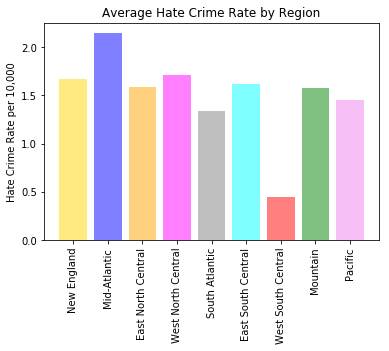

In [91]:
objects = ("New England", "Mid-Atlantic", "East North Central", "West North Central", "South Atlantic", "East South Central", "West South Central", "Mountain", "Pacific")
y_pos = np.arange(len(objects))
performance = [neweng["Average Crime Rate"].mean(), midatl["Average Crime Rate"].mean(),enctl["Average Crime Rate"].mean(),wnctl["Average Crime Rate"].mean(),satl["Average Crime Rate"].mean(),esctl["Average Crime Rate"].mean(),wsctl["Average Crime Rate"].mean(),mountain["Average Crime Rate"].mean(),pacific["Average Crime Rate"].mean()]
colors = ['gold', 'blue', 'orange', 'magenta', 'gray', 'cyan', 'red', 'green', 'violet']
tick_locations = [value+0.4 for value in y_pos]
plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects, rotation="vertical")
plt.ylabel('Hate Crime Rate per 10,000')
plt.title('Average Hate Crime Rate by Region')
plt.savefig('Resources/Crime Resources/avg_crime_by_region_bar.png') # save the figure to file

plt.show()

## Hate Crime Rate by Region over time (2012-2016) Line Plot

In [85]:

title = 'Hate Crime Rate by Region (2012-2016)'

labels = ["New England", "Mid-Atlantic", "East North Central", "West North Central", "South Atlantic", "East South Central", "West South Central", "Mountain", "Pacific"]

colors = ['gold', 'blue', 'orange', 'magenta', 'gray', 'cyan', 'red', 'green', 'violet']

mode_size = [8, 8, 8, 8, 8, 8, 8, 8, 8]

line_size = [2, 2, 2, 2, 2, 2, 2, 2, 2]

x_data = [
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
    [2012,2013,2014,2015,2016,2017],
]

y_data = [
    [neweng["2012 Crime Rate Per 10,000"].mean(), neweng["2013 Crime Rate Per 10,000"].mean(), neweng["2014 Crime Rate Per 10,000"].mean(), neweng["2015 Crime Rate Per 10,000"].mean(), neweng["2016 Crime Rate Per 10,000"].mean(),],
    [midatl["2012 Crime Rate Per 10,000"].mean(), midatl["2013 Crime Rate Per 10,000"].mean(), midatl["2014 Crime Rate Per 10,000"].mean(), midatl["2015 Crime Rate Per 10,000"].mean(), midatl["2016 Crime Rate Per 10,000"].mean(),],
    [enctl["2012 Crime Rate Per 10,000"].mean(), enctl["2013 Crime Rate Per 10,000"].mean(), enctl["2014 Crime Rate Per 10,000"].mean(), enctl["2015 Crime Rate Per 10,000"].mean(), enctl["2016 Crime Rate Per 10,000"].mean(),],
    [wnctl["2012 Crime Rate Per 10,000"].mean(), wnctl["2013 Crime Rate Per 10,000"].mean(), wnctl["2014 Crime Rate Per 10,000"].mean(), wnctl["2015 Crime Rate Per 10,000"].mean(), wnctl["2016 Crime Rate Per 10,000"].mean(),],
    [satl["2012 Crime Rate Per 10,000"].mean(), satl["2013 Crime Rate Per 10,000"].mean(), satl["2014 Crime Rate Per 10,000"].mean(), satl["2015 Crime Rate Per 10,000"].mean(), satl["2016 Crime Rate Per 10,000"].mean(),],
    [esctl["2012 Crime Rate Per 10,000"].mean(), esctl["2013 Crime Rate Per 10,000"].mean(), esctl["2014 Crime Rate Per 10,000"].mean(), esctl["2015 Crime Rate Per 10,000"].mean(), esctl["2016 Crime Rate Per 10,000"].mean(),],
    [wsctl["2012 Crime Rate Per 10,000"].mean(), wsctl["2013 Crime Rate Per 10,000"].mean(), wsctl["2014 Crime Rate Per 10,000"].mean(), wsctl["2015 Crime Rate Per 10,000"].mean(), wsctl["2016 Crime Rate Per 10,000"].mean(),],
    [mountain["2012 Crime Rate Per 10,000"].mean(), mountain["2013 Crime Rate Per 10,000"].mean(), mountain["2014 Crime Rate Per 10,000"].mean(), mountain["2015 Crime Rate Per 10,000"].mean(), mountain["2016 Crime Rate Per 10,000"].mean(),],
    [pacific["2012 Crime Rate Per 10,000"].mean(), pacific["2013 Crime Rate Per 10,000"].mean(), pacific["2014 Crime Rate Per 10,000"].mean(), pacific["2015 Crime Rate Per 10,000"].mean(), pacific["2016 Crime Rate Per 10,000"].mean(),],
]

traces = []

for i in range(0, 9):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines+markers',
        name = labels[i],
        line=dict(color=colors[i], width=line_size[i], shape=labels[i]),
        connectgaps=False,
        hoverinfo='none'
    ))

#    traces.append(go.Scatter(
#        x=[x_data[i][0], x_data[i][4]],
#        y=[y_data[i][0], y_data[i][4]],
#        mode='markers',
#        marker=dict(color=colors[i], size=mode_size[i])
#    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        range=[0, 3],
        title = 'Hate Crime Rate per 10,000',
        showgrid=True,
        zeroline=False,
        showline=True,
        showticklabels=True, 
        
    ),
    autosize=False,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    legend=dict(
        x=6.1, y=0.2,
        traceorder='reversed',
        font=dict(
            size=8
        )),
    #showlegend=True
    
)

annotations = []

# Adding labels
#for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
#    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
#                                  xanchor='right', yanchor='middle',
#                                  text=label,
#                                  font=dict(family='Arial',
#                                            size=16,
#                                            color=colors,),
#                                  showarrow=False))
    # labeling the right_side of the plot
#    annotations.append(dict(xref='paper', x=0.95, y=y_trace[4],
#                                  xanchor='left', yanchor='middle',
#                                  font=dict(family='Arial',
#                                            size=16,
#                                            color=colors,),
#                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Hate Crime Rate by Region Over Time',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: FBI:Uniform Crime Reporting - https://ucr.fbi.gov',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.plot(fig, filename='hate_crime_by_region_over_time')

C:\Users\dawzk\Anaconda3\envs\PythonData\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `hate_crime_by_region_over_time` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hate_crime_by_region_over_time.html'

In [161]:
sctgeo_df = pd.read_csv('Resources/Crime Resources/hate_crime_by_state_2012-2016.csv')
sctgeo_df.head()
sctgeo_df['text'] = sctgeo_df['State']+': ' + sctgeo_df['Average Crime Rate'].astype(str)
limits = [(0,0.1),(0.2,0.5),(0.6,2.0),(2.1,5.0),(5.0,6.0)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000


data =  [dict(
        type='scattergeo',
        #colorscale = scl,
        #autocolorscale = True,
        locations = sctgeo_df['Abbreviation'],
        marker = dict(
            size = sctgeo_df['Average Crime Rate'].astype(float),
            color = colors,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        locationmode = 'USA-states',
        text = sctgeo_df['text'],
        #zauto = False,
        #zmax = 5.0,
        #zmin = 0.0,
        #marker = dict(
        #    line = dict (
        #        color = 'rgb(255,255,255)',
        #        width = 2
         #   ) ),
        #colorbar = dict(
         #   title = "Crime Rate Per 10,000")
)   ]
    
layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=data, layout=layout )
py.plot( fig, validate=False, filename='d3-bubble-map-populations' )

C:\Users\dawzk\Anaconda3\envs\PythonData\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `d3-bubble-map-populations` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\d3-bubble-map-populations.html'

In [166]:


sctgeo_df = pd.read_csv('Resources/Crime Resources/hate_crime_by_state_2012-2016.csv')
sctgeo_df = sctgeo_df.sort_values('Average Crime Rate', ascending = "False")

sctgeo_df['text'] = sctgeo_df['State'] + ': ' + round(sctgeo_df['Average Crime Rate'],2).astype(str)
limits = [(0,1),(2,4),(5,6),(7,30),(31,50)]
colors = ["#399b07","#b9ea25","#eae025","#d69422","#c11515"]
states = []
scl = [ [0,"rgb(5, 10, 172)"],[35,"rgb(40, 60, 190)"],[50,"rgb(70, 100, 245)"],[60,"rgb(90, 120, 245)"],[70,"rgb(106, 137, 247)"],[100,"rgb(220, 220, 220)"] ]

for i in range(len(limits)):
    lim = limits[i]
    df_sub = sctgeo_df[lim[0]:lim[1]]
    #visible= True
    state = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        locations = df_sub['Abbreviation'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Average Crime Rate']*100,
            color = colors[i],
            opacity = 0.4,
            line = dict(width=0.5, color=colors[i]),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]))
        #colorscale = scl)
    states.append(state)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'lightgreen',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=states, layout=layout )
py.plot( fig, validate=False, filename='d3-bubble-map-populations' )

C:\Users\dawzk\Anaconda3\envs\PythonData\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `d3-bubble-map-populations` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\d3-bubble-map-populations.html'